In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import eigvalsh

In [2]:
Z = np.array([[1, 0], [0, -1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
I = np.eye(2, dtype=complex)

In [3]:
def hamiltonian(g0, g1, g2, g3, g4, g5=None, **kwargs):
    H =  g0 * np.kron(I, I)
    H += g1 * np.kron(Z, I)
    H += g2 * np.kron(I, Z)
    H += g3 * np.kron(Z, Z)
    H += g4 * np.kron(X, X) 
    H += (g4 if g5 is None else g5) * np.kron(Y, Y)
    return H

In [87]:
coeffs = pd.read_csv("coefficients.csv", index_col=0)
coeffs2 = pd.read_csv("coefficients_alt.csv", index_col=0)

In [88]:
coeffs

,g0,g1,g2,g3,g4,Exact,Simulated
R,,,,,,,
0.60,1.5943,0.51320,-1.1008,0.6598,0.08090,-0.5617,-0.5703
0.65,1.4193,0.50090,-1.0366,0.6548,0.08130,-0.6785,-0.6877
0.70,1.2668,0.48870,-0.9767,0.6496,0.08180,-0.7720,-0.7817
0.75,1.1329,0.47670,-0.9208,0.6444,0.08240,-0.8472,-0.8575
0.80,1.0144,0.46500,-0.8685,0.6390,0.08290,-0.9078,-0.9188
0.85,0.9090,0.45350,-0.8197,0.6336,0.08350,-0.9569,-0.9685
0.90,0.8146,0.44220,-0.7740,0.6282,0.08400,-0.9974,-1.0088
0.95,0.7297,0.43130,-0.7312,0.6227,0.08460,-1.0317,-1.0415
1.00,0.6531,0.42070,-0.6910,0.6172,0.08520,-1.0595,-1.0678


In [ ]:
coeffs.index = 0.529 * coeffs.index

In [91]:
energies = coeffs[["Exact", "Simulated"]]
coeffs.drop(columns=energies.columns, inplace=True)

In [92]:
energies = energies.rename(columns=lambda x: x + "_1706")

In [93]:
energy_ed = pd.Series(np.zeros(len(coeffs)), index=coeffs.index)
for idx in coeffs.index:
    p = coeffs.loc[idx]
    H = hamiltonian(**p)
    energy_ed[idx] = eigvalsh(H).min()
energies["ED_1706"] = energy_ed

In [94]:
energies

,Exact_1706,Simulated_1706,ED_1706
R,,,
0.60,-0.5617,-0.5703,-0.687590
0.65,-0.6785,-0.6877,-0.781574
0.70,-0.7720,-0.7817,-0.857304
0.75,-0.8472,-0.8575,-0.918683
0.80,-0.9078,-0.9188,-0.968368
0.85,-0.9569,-0.9685,-1.008706
0.90,-0.9974,-1.0088,-1.041349
0.95,-1.0317,-1.0415,-1.067749
1.00,-1.0595,-1.0678,-1.088784


In [6]:
energy_ed = pd.Series(np.zeros(len(coeffs2)), index=coeffs2.index, name="ED_1512")
for idx in coeffs2.index:
    p = coeffs2.loc[idx]
    H = hamiltonian(**p)
    energy_ed[idx] = eigvalsh(H).min()

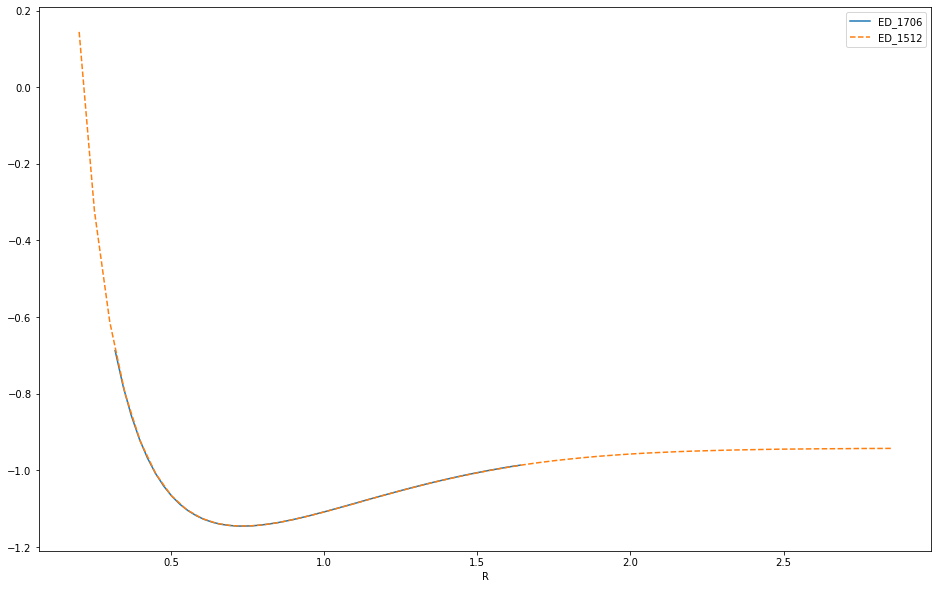

In [7]:
ax = energies["ED_1706"].plot(figsize=(16, 10))
energy_ed.plot(ax=ax, label="ED_1512", linestyle="dashed").legend()

In [81]:
def hamiltonian_diag(g0, g1, g2, g3, g4, **kwargs):    
    H = hamiltonian(0, g1, g2, g3, g4)
    
    return H @ H + 2*g3*H

def gs_energy(g0, g1, g2, g3, g4, **kwargs):
    g_abs = abs(g1) + abs(g2) + abs(g4) 
    energy = g0
    
    if g_abs >= abs(g3):
        g3 += np.sign(g3)*g_abs
        energy += g_abs
        print("ding")
        
    H_diag = np.diag(hamiltonian_diag(g0, g1, g2, g3, g4))
    H_min = H_diag.min()
    
    energy += -g3 - np.sqrt(g3**2 + H_min)
        
    return H_diag, H_min, energy

In [85]:
gs_energy(**p)[-1]

(-0.9867900597057192+0j)

In [83]:
g0, g1, g2, g3, g4 = p

In [84]:
eigvalsh(hamiltonian(**p)).min()

-0.9867900597057192

In [86]:
energy_ed

R
0.31740   -0.687590
0.34385   -0.781574
0.37030   -0.857304
0.39675   -0.918683
0.42320   -0.968368
0.44965   -1.008706
0.47610   -1.041349
0.50255   -1.067749
0.52900   -1.088784
0.55545   -1.105486
0.58190   -1.118394
0.60835   -1.128376
0.63480   -1.135603
0.66125   -1.140773
0.68770   -1.143891
0.71415   -1.145656
0.74060   -1.145774
0.76705   -1.144992
0.79350   -1.143019
0.81995   -1.140244
0.84640   -1.137050
0.87285   -1.133013
0.89930   -1.128548
0.92575   -1.123649
0.95220   -1.118613
0.97865   -1.112969
1.00510   -1.107556
1.03155   -1.101666
1.05800   -1.095830
1.08445   -1.089896
1.11090   -1.084041
1.13735   -1.077883
1.16380   -1.072020
1.19025   -1.066056
1.21670   -1.060369
1.24315   -1.054594
1.26960   -1.048909
1.29605   -1.043530
1.32250   -1.038060
1.34895   -1.032864
1.37540   -1.027897
1.40185   -1.023021
1.42830   -1.018226
1.45475   -1.013551
1.48120   -1.009239
1.50765   -1.005117
1.53410   -1.000987
1.56055   -0.997265
1.58700   -0.993490
1.61345   -0.98996

In [59]:
p

g0   -0.2421
g1    0.1733
g2   -0.0360
g3    0.4273
g4    0.1193
Name: 1.6399000000000001, dtype: float64

In [41]:
H = hamiltonian(0., g1, g2, g3, g4)
H

array([[ 0.4992+0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j],
       [ 0.    +0.j, -0.3024+0.j,  0.295 +0.j,  0.    +0.j],
       [ 0.    +0.j,  0.295 +0.j, -0.3634+0.j,  0.    +0.j],
       [ 0.    +0.j,  0.    +0.j,  0.    +0.j,  0.1666+0.j]])

In [74]:
def hamiltonian_new(g1, g2, g3, g4, **kwargs):
    a1 = g1**2 + g2**2 + g3**2 + 2*(g4**2)
    a2 = 2*(g1 + g2)*g3
    a3 = 2*(g1*g2 - g4**2 + g3**2)
    
    H = a1 * np.kron(I, I)
    H += a2 * np.kron(I, Z)
    H += a2 * np.kron(Z, I)
    H += a3 * np.kron(Z, Z)
    
    return H

In [75]:
hamiltonian_new(**p)

array([[ 0.80128032+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j, -0.08184884+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j, -0.08184884+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.331934  +0.j]])

In [45]:
g3*H

array([[ 0.16618368+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j, -0.10066896+0.j,  0.0982055 +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.0982055 +0.j, -0.12097586+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.05546114+0.j]])

In [26]:
eigvalsh(hamiltonian(**p)).min()

-0.9429725037828018

In [30]:
H = hamiltonian(**{**p, "g0":0.})

array([[ 0.4992+0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j],
       [ 0.    +0.j, -0.3024+0.j,  0.295 +0.j,  0.    +0.j],
       [ 0.    +0.j,  0.295 +0.j, -0.3634+0.j,  0.    +0.j],
       [ 0.    +0.j,  0.    +0.j,  0.    +0.j,  0.1666+0.j]])

In [31]:
hamiltonian_diag(**{**p, "g0":0.})

array([[ 0.581568  +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j, -0.10989216+0.j,  0.283436  +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.283436  +0.j, -0.10989216+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.13867784+0.j]])

In [19]:
-p["g3"] + np.sqrt(p["g3"]**2 + eigvalsh(hamiltonian_diag(**p)).min())

<ipython-input-19-cbe140e12037>:1: RuntimeWarning: invalid value encountered in sqrt
  -p["g3"] + np.sqrt(p["g3"]**2 + eigvalsh(hamiltonian_diag(**p)).min())


nan

In [20]:
eigvalsh(hamiltonian_diag(**p)).min()

-0.2956903112040429

In [25]:
-np.sqrt(p["g3"]**2 - eigvalsh(hamiltonian_diag(**p)).min()) + -p["g3"]

-0.970483501358091